In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')


In [2]:
# noise = indica a portcentagem de ruido que terá nos dados
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


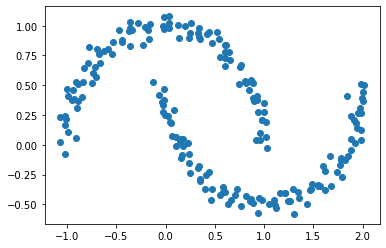

In [3]:
# resultados do conjunto de dados
plt.scatter(X[:,0], X[:,1])
plt.show()

 numero de clusters: 2
Total de dados: 200 
Total de clusters "identificados" como corretamente 151


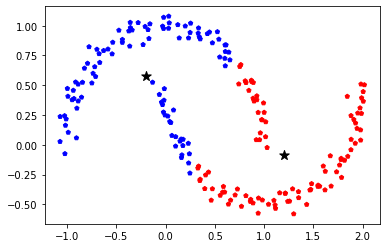

 numero de clusters: 3
Total de dados: 200 
Total de clusters "identificados" como corretamente 112


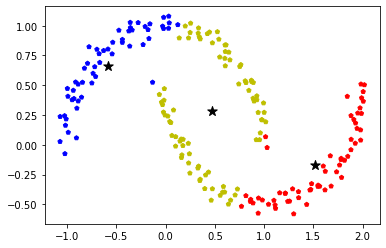

In [26]:
c = ['b', 'r', 'y', 'g', 'c', 'm']
k = [2,3]
for n in k:
    
    kmeans_n = KMeans(n_clusters=n, random_state=42)
    kmeans_n.fit(X)
    labels_n = kmeans_n.predict(X)
    centroids_n = kmeans_n.cluster_centers_
    y_n = kmeans_n.fit_predict(X)

    colors_n = [c[i] for i in labels_n]

    print(f' numero de clusters: {n}')
    print(f'Total de dados: {len(y_n)} ')
    print(f'Total de clusters "identificados" como corretamente {(y== y_n).sum()}')

    plt.scatter(X[:, 0], X[:, 1], c=colors_n, marker='p', s=20)
    plt.scatter(centroids_n[:, 0], centroids_n[:, 1],  marker="*", s=100, c="black")
    plt.show()   


### DBSCAN

In [21]:
# eps = como será feita c clusterização, espeficia a distancia maxima ente os elementos
# min_samples = qauntidade de amostrar mininas para serem consideradas na vizinhança para ser considerado como core point
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
y_db = db.fit_predict(X)


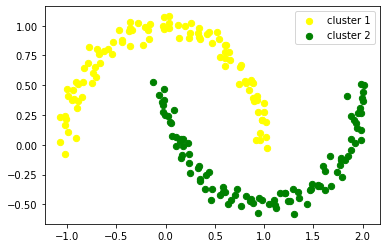

In [22]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c="yellow", marker="o", s=40, label="cluster 1")
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c="green", marker="o", s=40, label="cluster 2")
plt.legend()
plt.show()


In [23]:
print(f'Total de dados: {len(y)} ')
print(f'Total de clusters "identificados" como corretamente {(y == y_db).sum()}')


Total de dados: 200 
Total de clusters "identificados" como corretamente 200


Após a conclusão dos testes dos modelos, é possível concluir que o modelo de DBSCAN teve um melhor resultado com esse conjunto de dados.
O modelo Kmeans apresentou variações quando o números de clusters igual a 3, isto foi causado pelo alto número de clusters, fazendo com que os dados muitos próximos fiquem em clusters diferentes.
